In [1]:
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from pytesseract import Output

def create_contact_sheet(croped_faces_images):
    first_image=croped_faces_images[0]
    first_image = first_image.resize((int(first_image.width),int(first_image.height) ))

    contact_sheet=Image.new(first_image.mode, (first_image.width*5,first_image.height*2))

    x = 0
    y = 0
    for img in croped_faces_images:
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+first_image.width == contact_sheet.width:
            x=0
            y=y+first_image.height

        else:
            x=x+first_image.width

    return contact_sheet
    
  

Enter a keyword to search Mark
Searcing for 'Mark'
Result found in file a-0.png


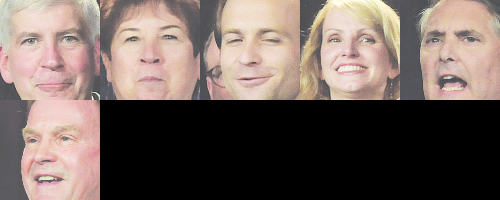

Result found in file a-1.png


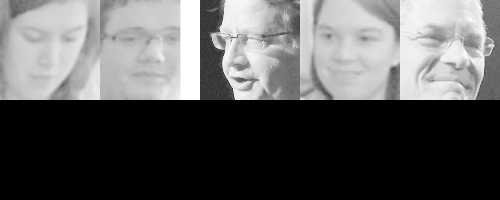

Result found in file a-2.png


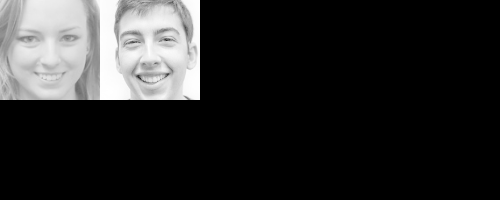

Result found in file a-3.png


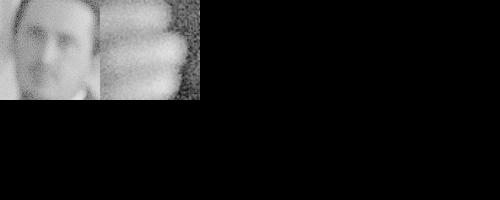

In [2]:
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

user_input = input("Enter a keyword to search ")
print("Searcing for '{}'".format(user_input))
# the rest is up to you!
imgzip = zipfile.ZipFile("readonly/small_img.zip")
inflist = imgzip.infolist()
name_list = imgzip.namelist()


i=0
custom_cfg = r'--oem 3 --psm 11'
contact_sheet = []
for f in inflist:
    ifile = imgzip.open(f)
    imgzip.extractall('readonly')
    img = cv.imread('readonly/{}'.format(name_list[i]))

    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    threshold_img = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
    details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config = custom_cfg, lang = 'eng')
    if user_input in details['text']:
        list_of_faces = []
                 
        faces = face_cascade.detectMultiScale(gray_image, 1.3, 6)
        for x,y,w,h in faces:
            croped_face = img[y:y+h,x:x+w]
            resize_face = cv.resize(croped_face, (100, 100))
            img_convert = cv.cvtColor(resize_face, cv.COLOR_BGR2RGB)
            im_pil = Image.fromarray(img_convert)
            list_of_faces.append(im_pil)
            cv.imshow('aaaa', resize_face)
            cv.waitKey(0)        
        contact_sheet.append((create_contact_sheet(list_of_faces), name_list[i]))        
        i+=1
        continue    
    i+=1
for im, name in contact_sheet:
        print('Result found in file {}'.format(name))    
        display(im)

